In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
%matplotlib inline

In [62]:
df = pd.read_csv('hiring.csv')
df

,experience,test_score,interview_score,salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [63]:
df['experience'] = df['experience'].fillna('zero')
df

,experience,test_score,interview_score,salary
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [64]:
from word2number import w2n

In [65]:
df['experience'] = df['experience'].apply(w2n.word_to_num)
df

,experience,test_score,interview_score,salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [66]:
df['test_score'] = df['test_score'].fillna(df['test_score'].mean())
df

,experience,test_score,interview_score,salary
0,0,8.000000,9,50000
1,0,8.000000,6,45000
2,5,6.000000,7,60000
3,2,10.000000,10,65000
4,7,9.000000,6,70000
5,3,7.000000,10,62000
6,10,7.857143,7,72000
7,11,7.000000,8,80000


In [67]:
X = df.drop('salary', axis = 'columns')
X

,experience,test_score,interview_score
0,0,8.000000,9
1,0,8.000000,6
2,5,6.000000,7
3,2,10.000000,10
4,7,9.000000,6
5,3,7.000000,10
6,10,7.857143,7
7,11,7.000000,8


In [68]:
y = df['salary']
y

0    50000
1    45000
2    60000
3    65000
4    70000
5    62000
6    72000
7    80000
Name: salary, dtype: int64

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
model = LinearRegression()

In [73]:
model.fit(X_train, y_train)

LinearRegression()

In [74]:
predictions = model.predict(X_test)
predictions

array([51503.56346465, 55789.42765948, 59259.23658782])

In [75]:
model.predict([[0, 8, 7]])


array([47320.79926545])

## Mean_Absolute_Error

In [76]:
from sklearn import metrics

In [77]:
MAE = metrics.mean_absolute_error(y_test, predictions)
print('MAE = ', MAE)

MAE =  2818.299739116497


## Mean_squared_error

In [78]:
MSE = metrics.mean_squared_error(y_test, predictions)
print("MSE = ", MSE)

MSE =  9167135.53617371


## Root Mean squared error

In [79]:
RMSE = np.sqrt(MSE)
print("RMSE = ", RMSE)

RMSE =  3027.7277843580505


## Calculating the deviation from the mean value

In [80]:
metrics.explained_variance_score(y_test, predictions)

0.7869919478906726

## Using the Statsmodel to predict the linear Regression

In [81]:
import statsmodels.api as sm

In [83]:
model = sm.OLS(y_train, X_train.assign(const = 1))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     11.21
Date:                Mon, 07 Feb 2022   Prob (F-statistic):              0.215
Time:                        06:43:23   Log-Likelihood:                -45.086
No. Observations:                   5   AIC:                             98.17
Df Residuals:                       1   BIC:                             96.61
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
experience       2859.9537    571.834     

c:\users\user\pycharmprojects\workplace23\venv\lib\site-packages\statsmodels\stats\stattools.py:75: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


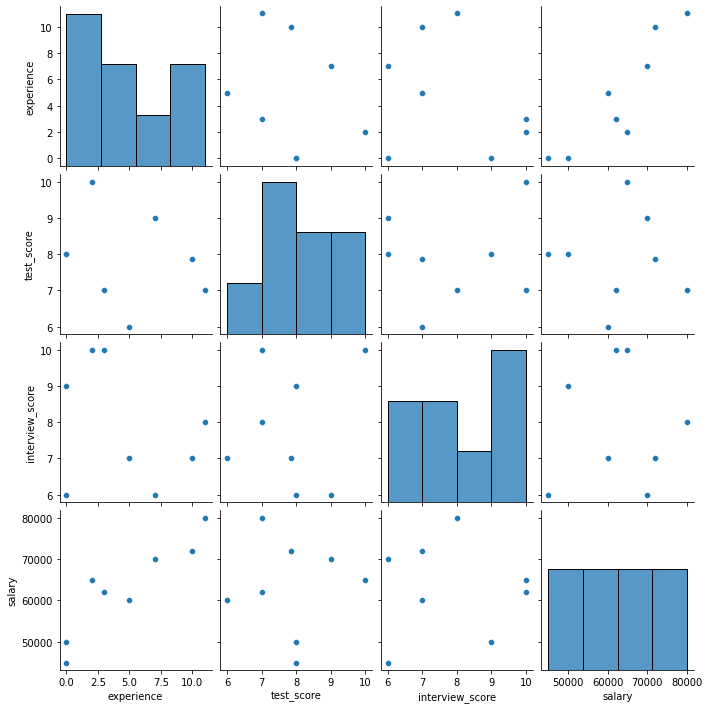

In [84]:
sns.pairplot(df)